In [10]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")
using StaticArrays, DifferentialEquations, DynamicalSystems, BenchmarkTools

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


@inbounds function doublependulum_rule(u, p, t)
    
    φ = u[3] - u[1]
    sin_ϕ = sin(φ)
    cos_ϕ = cos(φ)
    sin_θ₂ = sin(u[3])
    sin_θ₁ = sin(u[1])
    Δ = (p[4] + p[5]) - p[5] * cos_ϕ^2
    
    du1 = u[2]
    du2 = ( p[5] * ( cos_ϕ * (p[2] * u[2]^2 * sin_ϕ + p[1] * sin_θ₂) + p[3] * u[4]^2 * sin_ϕ ) -
               (p[4]  + p[5]) * p[1] * sin_θ₁) / (p[2] * Δ)
    du3 = u[4]
    du4 = (-p[5] * p[3] * u[4]^2 * sin_ϕ * cos_ϕ +
               (p[4]  + p[5]) * ( p[1] * (sin_θ₁ * cos_ϕ  - sin_θ₂)  - p[2] * u[2]^2 * sin_ϕ )) / (p[3] * Δ)

    return SVector{4}(du1, du2, du3, du4)
end

In [274]:
@inbounds function doublependulum_rule(u, p, t)
    
    φ = u[3] - u[1]
    sin_ϕ = sin(φ); cos_ϕ = cos(φ)
    sin_θ₂ = sin(u[3]); sin_θ₁ = sin(u[1])
    Δ = (p[4] + p[5]) - p[5] * cos_ϕ^2
    
    du1 = u[2]
    du2 = (p[5] * (cos_ϕ * (p[2] * u[2]^2 * sin_ϕ + p[1] * sin_θ₂) +
            p[3] * u[4]^2 * sin_ϕ) -
            (p[4]  + p[5]) * p[1] * sin_θ₁) / (p[2] * Δ)
    du3 = u[4]
    du4 = (-p[5] * p[3] * u[4]^2 * sin_ϕ * cos_ϕ +
            (p[4]  + p[5]) * (p[1] * (sin_θ₁ * cos_ϕ  - sin_θ₂) -
            p[2] * u[2]^2 * sin_ϕ)) / (p[3] * Δ)

    return SVector{4}(du1, du2, du3, du4)
end

@inbounds function doublependulum_rule_default(u, p, t)
    G, L1, L2, M1, M2 = p

    du1 = u[2]

    φ = u[3] - u[1]
    Δ = (M1 + M2) - M2*cos(φ)*cos(φ)

    du2 = (M2*L1*u[2]*u[2]*sin(φ)*cos(φ) +
                M2*G*sin(u[3])*cos(φ) +
               M2*L2*u[4]*u[4]*sin(φ) -
               (M1 + M2)*G*sin(u[1]))/(L1*Δ)

    du3 = u[4]

    du4 = (-M2*L2*u[4]*u[4]*sin(φ)*cos(φ) +
               (M1 + M2)*G*sin(u[1])*cos(φ) -
               (M1 + M2)*L1*u[2]*u[2]*sin(φ) -
               (M1 + M2)*G*sin(u[3]))/(L2*Δ)

    return SVector{4}(du1, du2, du3, du4)
end

doublependulum_rule_default (generic function with 1 method)

In [275]:
u0=[π/2, 0.0, 0.0, 0.5];
G=10.0; L1 = 1.0; L2 = 1.0; M1 = 1.0; M2 = 1.0
p = [G, L1, L2, M1, M2];

In [276]:
time = 1000; transient_time = 100; tstep = 0.001
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [277]:
ds = CoupledODEs(doublependulum_rule,  u0, p, diffeq = integ_set)
ds_def = CoupledODEs(doublependulum_rule_default,  u0, p, diffeq = integ_set)

4-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  doublependulum_rule_default
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [10.0, 1.0, 1.0, 1.0, 1.0]
 time:          0.0
 state:         [1.5707963267948966, 0.0, 0.0, 0.5]


In [278]:
@benchmark tr, trange = trajectory(ds, time, Δt = tstep; Ttr = transient_time)

BenchmarkTools.Trial: 18 samples with 1 evaluation.
 Range (min … max):  277.413 ms … 294.333 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     282.421 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   282.309 ms ±   3.647 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▁                 █▁                                           
  █▁▁▁▁▁▆▆▁▁▁▁▁▆▆▆▆▆██▆▁▁▁▁▁▁▁▁▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆ ▁
  277 ms           Histogram: frequency by time          294 ms <

 Memory estimate: 30.52 MiB, allocs estimate: 14.

In [279]:
@benchmark tr_def, trange = trajectory(ds_def, time, Δt = tstep; Ttr = transient_time)

BenchmarkTools.Trial: 10 samples with 1 evaluation.
 Range (min … max):  519.884 ms … 542.553 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     526.164 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   527.912 ms ±   8.291 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▁█ ▁▁                        ▁▁       ▁       ▁             ▁  
  ██▁██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██▁▁▁▁▁▁▁█▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  520 ms           Histogram: frequency by time          543 ms <

 Memory estimate: 30.52 MiB, allocs estimate: 14.

In [280]:
@btime lyapunovspectrum(ds, time*5)

  3.152 s (165 allocations: 13.98 KiB)


4-element Vector{Float64}:
  0.2263901515805027
  0.0015053546015356596
 -0.0012618140526577332
 -0.2266768549801119

In [281]:
@btime lyapunovspectrum(ds_def, time*5)

  9.543 s (165 allocations: 13.98 KiB)


4-element Vector{Float64}:
  0.24257656342258643
  0.001589908265344354
 -0.0015611943161611258
 -0.2425947479672875

In [254]:
using CairoMakie

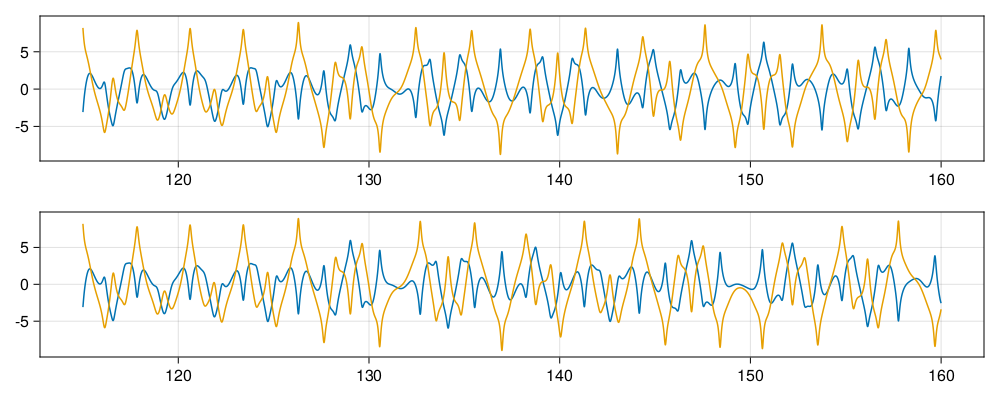

In [269]:
ts, tf = 15000, 60000
f = Figure(resolution = (1000, 400))
ax1 = Axis(f[1, 1])
lines!(ax1, trange[ts:tf], tr[ts:tf, 2])
lines!(ax1, trange[ts:tf], tr[ts:tf, 4])
ax2 = Axis(f[2, 1])
lines!(ax2, trange[ts:tf], tr_def[ts:tf, 2])
lines!(ax2, trange[ts:tf], tr_def[ts:tf, 4])
f